In [27]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.metrics import accuracy_score
admindata = pd.read_csv('admission_data.csv')

In [28]:
#print first 5 rows of the dataset
admindata.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Admit
0,337,118,4,4.5,4.5,9.65,1,0.92,1
1,324,107,4,4.0,4.5,8.87,1,0.76,1
2,316,104,3,3.0,3.5,8.00,1,0.72,1
3,322,110,3,3.5,2.5,8.67,1,0.80,1
4,314,103,2,2.0,3.0,8.21,0,0.65,0


In [29]:
# number of rows and columns in dataset
admindata.shape

(500, 9)

In [30]:
# get statistical measures of the data
admindata.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000,500.000000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174,0.574000
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114,0.494989
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000,0.000000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000,0.000000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000,1.000000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000,1.000000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000,1.000000


In [57]:
admindata['Admit'].value_counts()

1    287
0    213
Name: Admit, dtype: int64

In [58]:
admindata.groupby('Admit').mean()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Admit,,,,,,,,
0,307.572770,102.737089,2.356808,2.723005,2.906103,8.084460,0.276995,0.589437
1,323.076655,110.498258,3.675958,3.857143,3.912892,8.941568,0.770035,0.819930


In [63]:
# Separating the data and labels
X = admindata.drop(columns='Chance of Admit', axis = 1)
X = X.drop(columns='Admit', axis = 1)
Y = admindata['Admit']

print(X)

     GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research
0          337          118                  4  4.5  4.5  9.65         1
1          324          107                  4  4.0  4.5  8.87         1
2          316          104                  3  3.0  3.5  8.00         1
3          322          110                  3  3.5  2.5  8.67         1
4          314          103                  2  2.0  3.0  8.21         0
..         ...          ...                ...  ...  ...   ...       ...
495        332          108                  5  4.5  4.0  9.02         1
496        337          117                  5  5.0  5.0  9.87         1
497        330          120                  5  4.5  5.0  9.56         1
498        312          103                  4  4.0  5.0  8.43         0
499        327          113                  4  4.5  4.5  9.04         0

[500 rows x 7 columns]


In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [66]:
print(X.shape, X_train.shape, X_test.shape)

(500, 7) (400, 7) (100, 7)


In [67]:
classifier = svm.SVC(kernel='linear')

In [68]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [69]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [70]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.8775


In [71]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [72]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.85


In [74]:
input_data = (321,109,3,3,4,8.2,1)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not accepted')
else:
  print('The person is accepted')

[1]
The person is accepted


c:\ProgramData\Anaconda3\envs\MachineLearning\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [75]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [76]:
loaded_model = pickle.load(open('finalized_model.sav', 'rb'))

In [77]:
input_data = (321,109,3,3,4,8.2,1)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not accepted')
else:
  print('The person is accepted')

[1]
The person is accepted


c:\ProgramData\Anaconda3\envs\MachineLearning\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


<AxesSubplot:xlabel='Admit', ylabel='CGPA'>

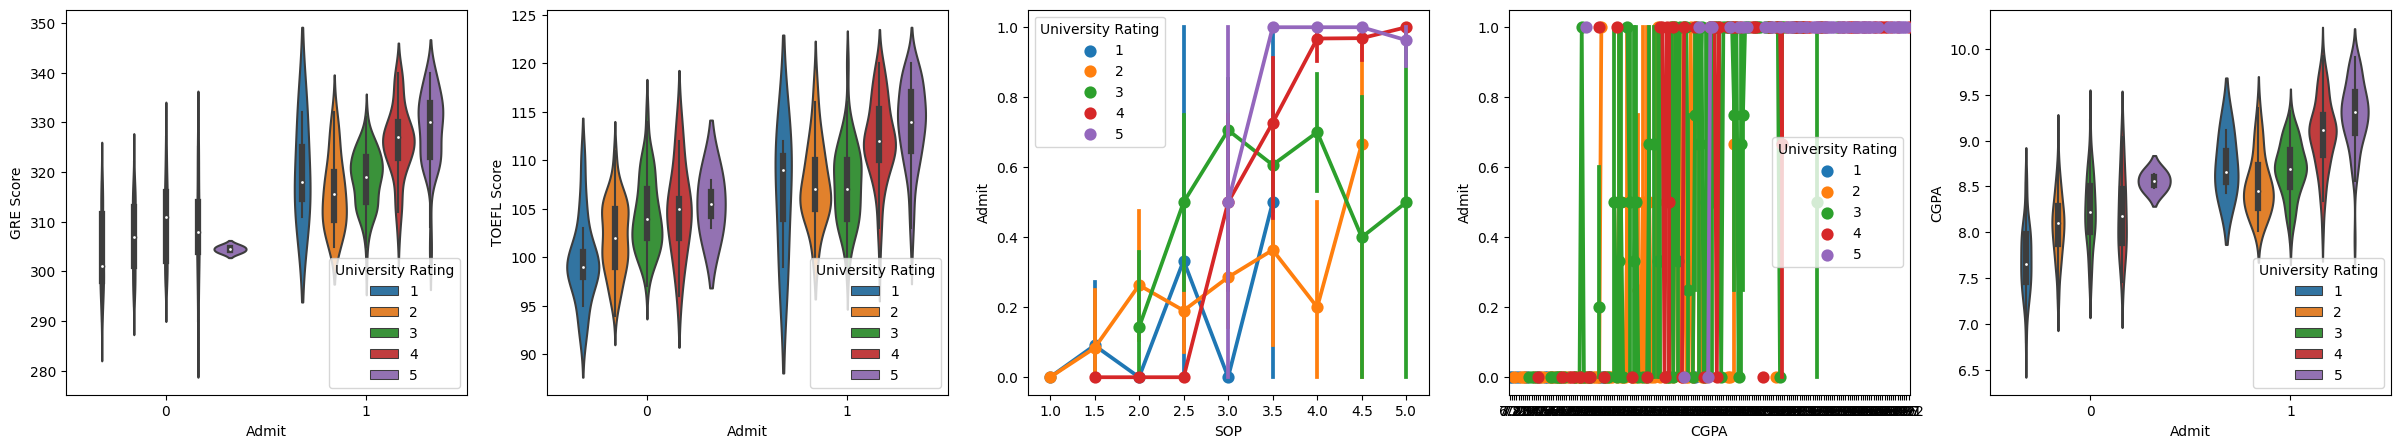

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="Admit", y="GRE Score", hue="University Rating", data=admindata, ax=axs[0])
sns.violinplot(x="Admit", y="TOEFL Score", hue="University Rating", data=admindata, ax=axs[1])
sns.pointplot(x="SOP", y="Admit", hue="University Rating", data=admindata, ax=axs[2])
sns.pointplot(x="CGPA", y="Admit", hue="University Rating", data=admindata, ax=axs[3])
sns.violinplot(x="Admit", y="CGPA", hue="University Rating", data=admindata, ax=axs[4])


In [64]:
admindata.corr().abs()[["Admit"]]


,Admit
GRE Score,0.679429
TOEFL Score,0.631663
University Rating,0.571017
SOP,0.566482
LOR,0.538494
CGPA,0.701471
Research,0.491159
Chance of Admit,0.808357
Admit,1.000000


In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(admindata[['GRE Score','TOEFL Score','University Rating','SOP','LOR','CGPA','Research']], admindata.Admit, test_size=0.5, random_state=0)

In [52]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [53]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [38]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)


SVC()

In [54]:
from sklearn import metrics
predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))

0.848


In [56]:
predict_array = [[302,102,1,2,1.5,8,0]]

predict_admit = model.predict(predict_array)
print(predict_admit)

[1]


In [43]:
import pickle

# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))
 
# some time later...
 


In [44]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.86


In [50]:
Xnew = [[302,102,1,2,1.5,8,0]]
ynew = model.predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

X=[302, 102, 1, 2, 1.5, 8, 0], Predicted=1


In [49]:
input_data = [302,102,1,2,1.5,8,0]
input_data_array = np.asarray(input_data)

input_data_reshaped = input_data_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)


[1]
